## Classifying Movie Reviews - _Binary Classification Problem_

In [7]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Because only the top 10,000 most frequent words are being used, no word index will exceed 10,000:

In [8]:
max([max(sequence) for sequence in train_data])

9999

Cleaning the data - turning into 10,000-dimensional vectors of 0s or 1s

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Building the model

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid"),
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Separating test data into test and validation sets

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Training the model

In [12]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 5s 68ms/step - loss: 0.5984 - accuracy: 0.7170 - val_loss: 0.4812 - val_accuracy: 0.8129
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3851 - accuracy: 0.8757 - val_loss: 0.3403 - val_accuracy: 0.8779
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2747 - accuracy: 0.9085 - val_loss: 0.2930 - val_accuracy: 0.8878
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2174 - accuracy: 0.9257 - val_loss: 0.2835 - val_accuracy: 0.8871
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1817 - accuracy: 0.9385 - val_loss: 0.2764 - val_accuracy: 0.8906
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1553 - accuracy: 0.9483 - val_loss: 0.2878 - val_accuracy: 0.8839
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1336 - accuracy: 0.9572 - val_loss: 0.2912 - val_accuracy: 0.8861
Epoch 8/20
30

Plotting training vs validation Loss and Accuracy

In [21]:
import matplotlib.pyplot as plt

history_dict = history.history
epochs = range(1,21)
training_loss = history_dict["loss"]
validation_loss = history_dict["val_loss"]
training_acc = history_dict["accuracy"]
validation_acc = history_dict["val_accuracy"]

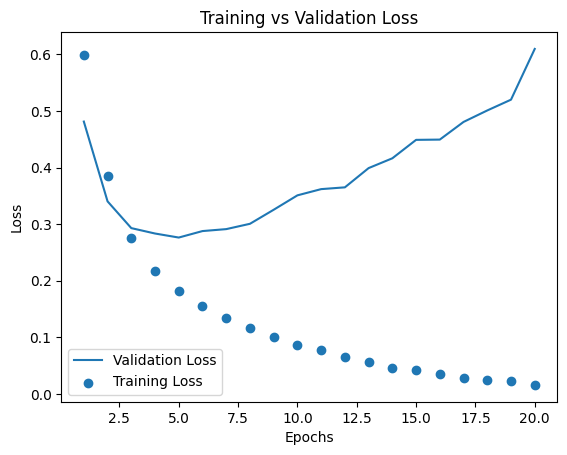

In [22]:
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.scatter(epochs, training_loss, label='Training Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

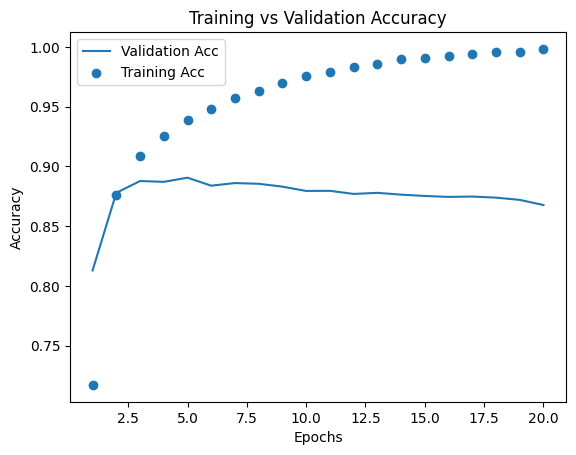

In [24]:
plt.clf() # clearing the figure
plt.plot(epochs, validation_acc, label='Validation Acc')
plt.scatter(epochs, training_acc, label='Training Acc')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Model is overfit, looks to peak around epoch 4 - recreating model

In [26]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid"),
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 1s 14ms/step - loss: 0.4516 - accuracy: 0.8178
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2668 - accuracy: 0.9050
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2108 - accuracy: 0.9248
Epoch 4/4
49/49 [==============================] - 1s 13ms/step - loss: 0.1799 - accuracy: 0.9341


In [27]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.2876 - accuracy: 0.8858
